In [1]:
using MAT;
using CuArrays;
using Plots;
include("nnmf.jl");

In [9]:
filename = "data/tetris_piano_poly_V.mat";

comp_list = [8,48,64,96,128];
iter_list = [8,64,128,256];

compile_time = @elapsed nnmf(filename,1,1);
elapsed_time = zeros(length(comp_list),length(iter_list));

figure_list = Array{Any}(undef,length(comp_list),length(iter_list))
for i_comp = 1:length(comp_list), i_iter = 1:length(iter_list)
    num_components = comp_list[i_comp]; 
    num_iterations = iter_list[i_iter];
    elapsed_time[i_comp,i_iter] = @elapsed W_i,H_i = nnmf(filename,num_components,num_iterations);
    
    # make a figure of the approximate matrix and save as png file
    fig_file = string("figures/",splitdir(filename)[2][1:end-4],"_",num_components,"comp","_",num_iterations,"iter");
    fig = heatmap(W_i[:,:,1]*H_i[:,:,1]);
    title!(fig, fig_file);
    png(fig, fig_file);
end

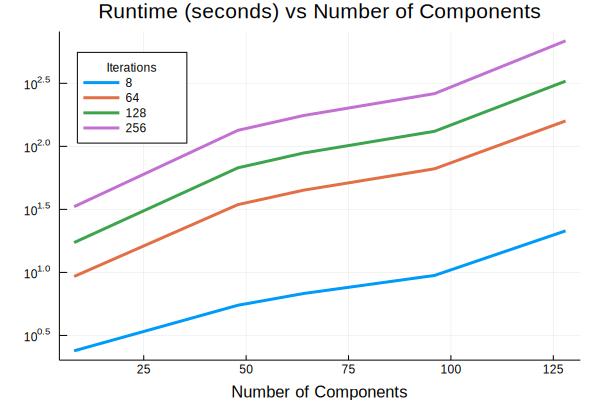

In [18]:
fig = plot(comp_list, elapsed_time, legend=:topleft, yaxis=:log, label=["8","64","128","256"],lw=3,legend_title="Iterations")
xlabel!(fig, "Number of Components")
title!("Runtime (seconds) vs Number of Components")